In [107]:
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset 
from surprise import SVD  
from surprise import accuracy 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### Sistemas de Recomendación - Tu Futuro según la Data
Este proyecto propone construir un modelo de clasificación supervisada que, a partir de datos demográficos y socioeconómicos de una persona adulta (edad, nivel educativo, ocupación, estado civil, país de origen, etc.), prediga si dicha persona ganará más o menos de 50,000 USD al año.

En base a los resultados del modelo, los estudiantes deberán desarrollar un sistema de recomendación interpretativo, capaz de sugerir posibles estrategias o cambios para aumentar la probabilidad de superar ese umbral de ingresos.

> - Objetivos
> - Explorar los datos del censo.
> - Construir perfiles socioeconómicos.
> - Explorar la importancia y peso de variables sociales (educación, género, raza, etc.) en predicciones económicas.
> - Aplicar técnicas de sistemas de recomendación.
> - Visualizar y comunicar hallazgos de forma profesional.

Este dataset incluye variables como:

- Edad
- Nivel educativo
- Estado civil
- Ocupación
- Horas trabajadas por semana
- Sexo
- País de origen
- Ingreso anual (>50K o <=50K)

### EDA

In [108]:
df = pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/internal-link-proyecto13.csv')

In [109]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [110]:
df.drop(columns=['race', 'sex', 'capital.gain', 'capital.loss', 'native.country', 'workclass'], inplace=True)

Elimino columnas que no me aportan a mi analisis de como aumentar los ingresos. 

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   hours.per.week  32561 non-null  int64 
 8   income          32561 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


In [112]:
df.drop_duplicates(inplace=True)

In [113]:
(df == '?').sum()


age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
hours.per.week       0
income               0
dtype: int64

In [114]:
df.replace('?', np.nan, inplace=True)

In [115]:
df['education'].value_counts(), df['education.num'].value_counts()

(education
 HS-grad         10490
 Some-college     7277
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
 Name: count, dtype: int64,
 education.num
 9     10490
 10     7277
 13     5353
 14     1722
 11     1382
 7      1175
 12     1067
 6       933
 4       645
 15      576
 5       514
 8       433
 16      413
 3       332
 2       166
 1        50
 Name: count, dtype: int64)

In [116]:
len(df['education'])

32528

In [121]:
df['income'].value_counts()

income
<=50K    24691
>50K      7837
Name: count, dtype: int64

In [117]:
df_num = df.copy()

In [118]:
df_num.drop(columns=['education'])

,age,fnlwgt,education.num,marital.status,occupation,relationship,hours.per.week,income
0,90,77053,9,Widowed,NaN,Not-in-family,40,<=50K
1,82,132870,9,Widowed,Exec-managerial,Not-in-family,18,<=50K
2,66,186061,10,Widowed,NaN,Unmarried,40,<=50K
3,54,140359,4,Divorced,Machine-op-inspct,Unmarried,40,<=50K
4,41,264663,10,Separated,Prof-specialty,Own-child,40,<=50K
...,...,...,...,...,...,...,...,...
32556,22,310152,10,Never-married,Protective-serv,Not-in-family,40,<=50K
32557,27,257302,12,Married-civ-spouse,Tech-support,Wife,38,<=50K
32558,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,40,>50K
32559,58,151910,9,Widowed,Adm-clerical,Unmarried,40,<=50K


In [124]:
df_num ['number_marital.status'] = pd.factorize(df['marital.status'])[0]
df_num ['number_occupation'] = pd.factorize(df['occupation'])[0]
df_num ['number_relationship'] = pd.factorize(df['relationship'])[0]
df_num ['number_income'] = pd.factorize(df['income'])[0]
df_num_factorize = df_num.select_dtypes(include=['number'])

In [127]:
df_num_factorize

,age,fnlwgt,education.num,hours.per.week,number_marital.status,number_occupation,number_relationship,number_income
0,90,77053,9,40,0,-1,0,0
1,82,132870,9,18,0,0,0,0
2,66,186061,10,40,0,-1,1,0
3,54,140359,4,40,1,1,1,0
4,41,264663,10,40,2,2,2,0
...,...,...,...,...,...,...,...,...
32556,22,310152,10,40,3,11,0,0
32557,27,257302,12,38,4,10,5,0
32558,40,154374,9,40,4,1,4,1
32559,58,151910,9,40,0,4,1,0


In [129]:
plt.figure(figsize=(10, 5))
sns.barplot(df_num_factorize, df['number_income'])

KeyError: 'number_income'

<Figure size 1000x500 with 0 Axes>

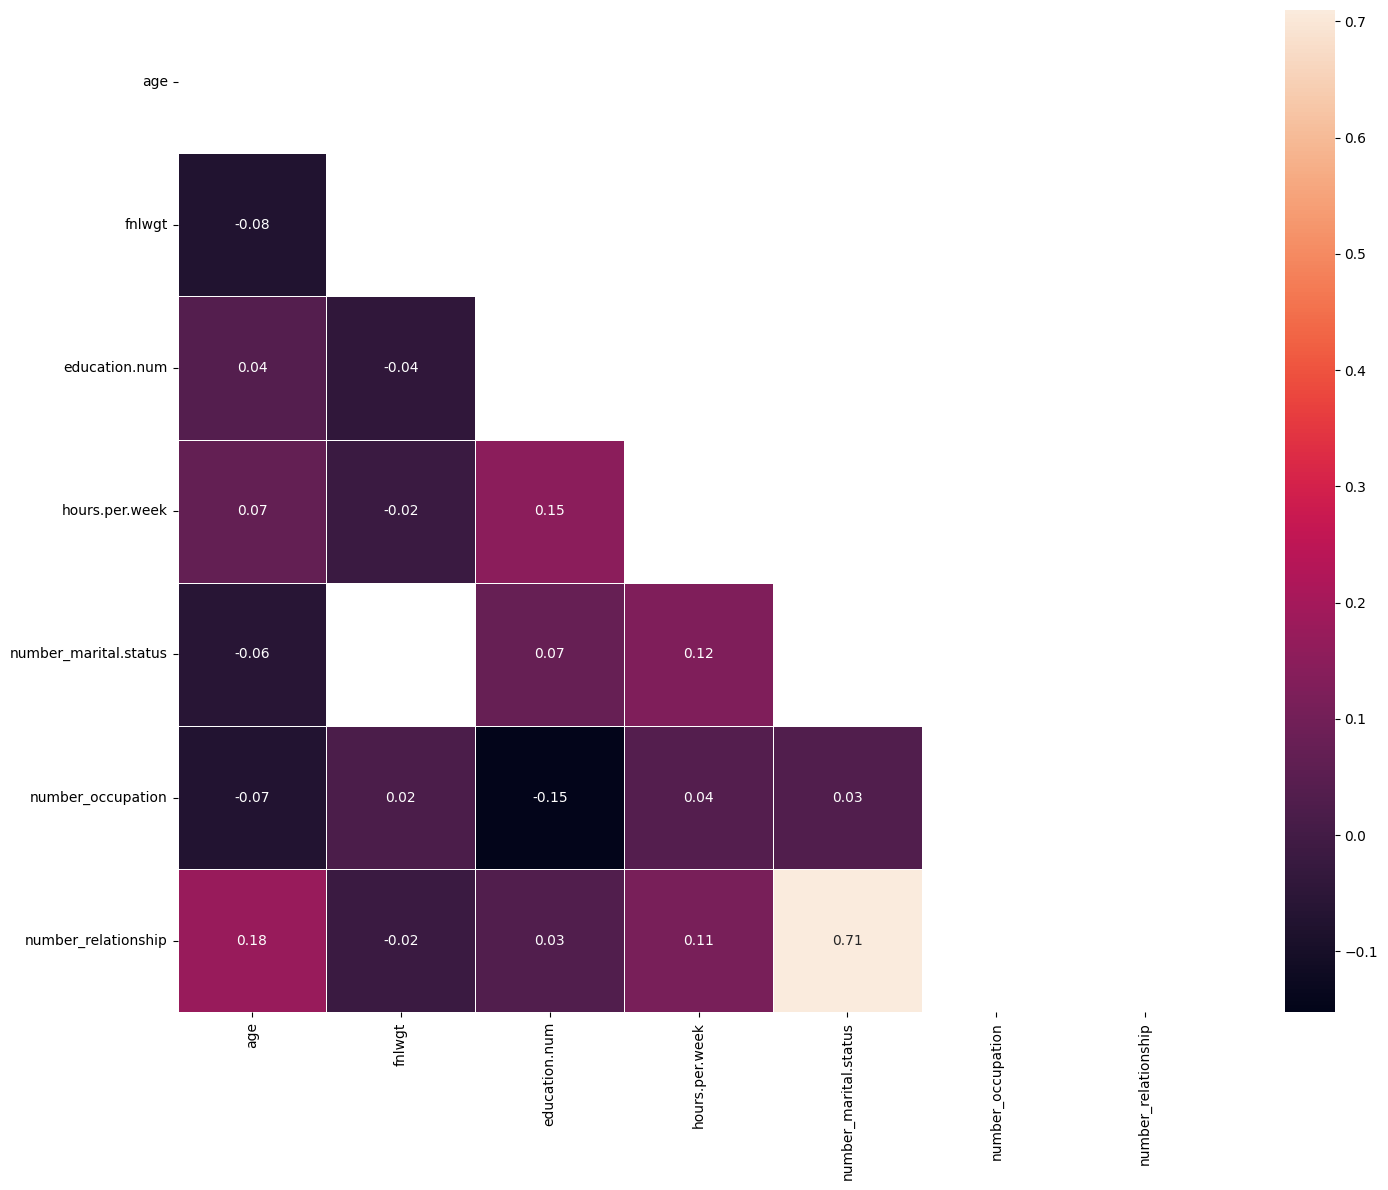

In [120]:
corr = df_num_factorize.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.01]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()